<a href="https://colab.research.google.com/github/notKguin/MMK-Informservice/blob/main/lecture_materials/%D0%9E%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B8_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(%D0%BE%D0%B1%D1%89%D0%B8%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Описание кейса**



> Компания, занимающаяся развитием киберспорта, планирует запустить таргетированную рекламу среди пользователей Вконтакте. В связи с этим им необходимо изучить целевую аудиторию и составить портреты пользователей, увлекающихся киберспортом, в том числе в разрезе онлайн-игр. Нашему коллеге-аналитику необходимо построить дашборд с анализом выборки пользователей из онлайн-магазина, расположенного на платформе Вконтакте. Специалист по сбору данных представил датасет с выгруженной информацией по профилям в формате csv. Однако данные в нем в том виде, в котором они есть, не подходят для построения дашборда.

**Наша задача** — очистить данные и привести их в нужный формат.

Какая **информация важна** для нашего коллеги:
1. id пользователя
2. возраст (кол-во лет)
3. пол (1: женский, 2: мужской, 0: не указан)
3. город проживания (если указан)
4. страна проживания (если указана)
5. количество подписчиков (если указано)
6. дата последнего входа в магазин
7. сумма трат в магазине (значение обязательно должно быть указано, пользователей с неуказанным значением необходимо исключить; значения должны быть соизмеримы, т.е. указаны в единой валюте)
8. наименования игр, которыми интересуется пользователь (значение обязательно должно быть указано, пользователей с неуказанным значением необходимо исключить)

**Формат файла** с результатами: *xlsx* или *csv*

# **Подгрузка и обзор датасета**

## Библиотека pandas

[Официальная документация библиотеки pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)


Объект DataFrame состоит из так называемых объектов Series. Обязательно наличие индексного столбца (index)
![](https://miro.medium.com/max/1400/0*YwPNRwWwTfra-IzR)

DataFrame представляет собой прямоугольную таблицу значений:
*   каждая строка - **пример**, или же **sample**,
*   каждая колонка - **признак**, или же **feature**.

Индекс примера   | Признак_1 | Признак_2 | Признак_3 | Признак_4 | Признак_5
-----------------|-----------|-----------|-----------|-----------|-----------
 1               | 10        | 20        | "строка 1"| True      | 3.1415926    
 2               | 15        | 10        | "строка 2"| False     | 2.71      
 3               | 12        | 40        | "строка 3"| False     | -1.12345  


Также, таблицы часто называют датасетами, а строки - наблюдениями или записями.

**Типы данных**, используемые в pandas:
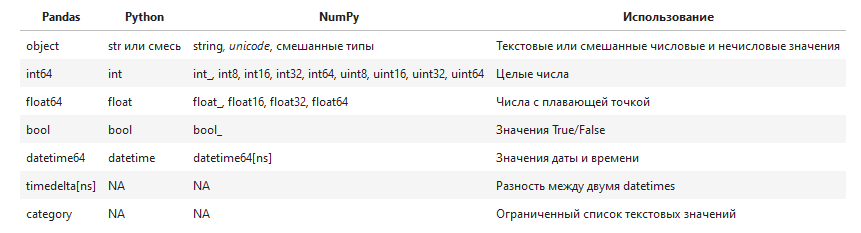

## Импорт библиотек

In [ ]:
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json

## Подгрузка файла

**1 способ:** подгрузка файла в среду выполнения кода с google диска

https://drive.google.com/file/d/1LFSh5lDLiSWu0HEy54OFKS9lJuIFEJJg/view?usp=sharing

In [ ]:
# при ошибке загрузки в текущей версии gdown необходимо его обновить
!pip install --upgrade gdown

In [ ]:
!gdown --id 1LFSh5lDLiSWu0HEy54OFKS9lJuIFEJJg

In [ ]:
dataset = pd.read_csv('/content/shop_users.csv')

In [ ]:
dataset.head(2)

**2 способ:** подгрузка файла в среду выполнения кода с персонального компьютера

In [ ]:
uploaded = files.upload()

## Чтение файла

1. Файлы формата csv, tsv

In [ ]:
df = pd.read_csv('shop_users.csv')

Параметр *sep* не указываем, т.к. по умолчанию sep=',' (что соответствует используемому разделителю в нашем файле)

2. Файлы формата xls, xlsx

In [ ]:
# df = pd.read_excel('shop_users.xlsx')

In [ ]:
df

## Обзор датасета

In [ ]:
# показывает наблюдения с начала датасета (по умолчанию - 5 наблюдений)
df.head()

In [ ]:
# показывает наблюдения с начала датасета (можно указать нужное количество выводимых строк)
df.head(2)

In [ ]:
# показывает наблюдения с конца датасета (можно указать нужное количество выводимых строк)
df.tail()

In [ ]:
# показывает случайно выбранные наблюдения (можно указать нужное количество выводимых строк)
df.sample(4)

In [ ]:
# тип объекта
type(df)

In [ ]:
type(df['id'])

In [ ]:
# размеры датасета (количество ячеек: строки Х столбцы)
df.size

In [ ]:
# длина датасета (количество наблюдений)
len(df)

In [ ]:
# количество признаков в датасете (количество столбцов)
len(df.axes[1])

In [ ]:
# размеры датасета (количество наблюдений и признаков)
df.shape

In [ ]:
# информация о типах данных
df.dtypes

In [ ]:
# информация о датасете:
# количество записей,
# количество столбцов,
# наименование признаков,
# количество заполненных (не пустых) значений по каждому признаку,
# тип данных по каждому признаку,
# объем занимаемой памяти
df.info()

## Выявление проблем

1. Наличие признаков, не представляющих ценности в рамках кейса ('Unnamed: 0', 'common_count', 'is_closed', 'home_town', 'relation')
2. Возможно наличие дубликатов
3. Наличие незаполненных значений ('city', 'last_seen', 'followers_count', 'costs', 'games')
4. Наличие вложенных значений (словарей по признакам 'city', 'country', 'last_seen', 'costs' и списков словарей по признаку 'games')
5. Приведение признаков в необходимый формат (в datetime: 'bdate, 'last_seen', в float: затраты из признака 'costs')
6. Необходимость расчета признака 'age' (от признака 'bdate')
7. Наличие закодированных значений (по признаку 'sex')
8. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

## Исключение признаков, не представляющих ценности в рамках кейса

Перед проведением манипуляций рекомендовано создать копию исходного датасета в отдельную переменную, чтобы в случае необходимости или ошибки при обработке без труда вернуться к исходной версии

In [ ]:
df_copy = df.copy()

In [ ]:
# при использовании выражения:
# df_copy = df
# копия не создастся, а датафрейм просто сохранится также в переменную df_copy,
# и при его изменении при обращении к переменной df_copy он также будет изменен в переменной df.

In [ ]:
# выводит список колонок датафрейма
df_copy.columns

In [ ]:
# создание списка "ненужных" колонок
columns = ['Unnamed: 0', 'common_count', 'is_closed', 'home_town', 'relation']

In [ ]:
# параметр inplace=True позволяет автоматически перезаписать текущий датафрейм
# без использования конструкции: df_copy = df_copy.drop(columns=columns)
df_copy.drop(columns=columns, inplace=True)

In [ ]:
# также с помощью drop() можно удалять и сами наблюдения (см. тех. документацию)

In [ ]:
# проверка списка колонок датафрейма
df_copy.columns

## Проверка и исключение дубликатов

### Проверка на дубликаты

In [ ]:
# проверка на дубликаты: выдает объект Series с булевыми значениями True/False
df_copy.duplicated()

In [ ]:
# нас интересует количество дубликатов
# т.к. True = 1, False = 0, то необходимо сложить все значения по данному объекту Series
df_copy.duplicated().sum()

In [ ]:
# проверка дубликатов по столбцу id
df_copy.duplicated(subset='id').sum()

In [ ]:
# проверка дубликатов по нескольким столбцам
# (например, сколько однополых людей, родившихся в одинаковые дни)
# параметр keep=False присваивает значения True всем найденным дубликатам
# (по умолчанию keep='first', т.е. присваивает значение False первому из совпадений)
df_copy.duplicated(subset=['bdate', 'sex'], keep=False).sum()

### Исключение дубликатов

In [ ]:
# исключение дубликатов по всем признакам датафрейма
df_copy.drop_duplicates(inplace=True)

In [ ]:
# исключение дубликатов по столбцу
# (в нашем случае операция аналогична предыдущей)
# df_copy.drop_duplicates(subset='id', inplace=True)

In [ ]:
# исключение дубликатов по нескольким столбцам
# (в нашем случае нет необходимости)
# параметр keep=False удаляет все найденные дубликаты
# (по умолчанию keep='first', т.е. удаляет все дубликаты, кроме первого)
# df_copy.drop_duplicates(subset=['bdate', 'sex'], keep=False, inplace=True)

In [ ]:
# контроль размеров датафрейма
df_copy.shape

In [ ]:
3525-3367

# **Проверка данных на пропуски, их обработка или исключение**

**NaN** и **None**:
* **NaN** отвечает за отсутствующее в ячейке число. Его тип данных float, поэтому с NaN можно проводить математические операции.
* **None**
принадлежит к нечисловому типу NoneType, и математические операции
с ним неосуществимы.

Строки с этими значениями **не
всегда стоит удалять**, иногда их наличие несет ценность для анализа, в некоторых случаях пропуски можно восстановить.

## Проверка на пропущенные значения

In [ ]:
# проверка на пропущенные значения: выдает объект DataFrame с булевыми значениями True/False
df_copy.isna()

In [ ]:
# нас интересует, в первую очередь, количество пропущенных значений
# т.к. True = 1, False = 0, то необходимо сложить все значения по столбцам данного объекта DataFrame
df_copy.isna().sum()

In [ ]:
# isnull() - альтернативный метод проверки на пустые значения
# можно оценить количество пропущенных значений в процентах, применив обычную арифметику
df_copy.isnull().mean()*100

In [ ]:
# обратные методы: notna() и notnull() - количество заполненных значений
df_copy.notna().sum()

**Обзор пропущенных значений** по признакам:
1. 'city' - пользователи указывают город по желанию (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуски нет возможности)
2. 'last_seen' - должно быть указано значение последнего входа в магазин (скорее всего, ошибка в базе данных, либо при выгрузке данных в файл; по кейсу не указана необходимость в исключении пропущенных значений)
3. 'followers_count' - по пользователям с закрытым аккаунтом информация не предоставляется (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуски нет возможности)
4. 'costs' - затраты в магазине (по кейсу требование - исключить пропущенные значения; восстановить пропуски нет возможности)
5. 'games' - списки игр, которыми интересуются пользователи (по кейсу требование - исключить пропущенные значения; восстановить пропуски нет возможности)

## Исключение пропусков

In [ ]:
# необходимо исключить наблюдения с пропусками по признакам 'costs' и 'games'
df_copy.dropna(subset=['costs', 'games'], inplace=True)

In [ ]:
# применение метода dropna() без указания значений параметра subset
# df_copy.dropna(inplace=True)
# приведет к удалению всех наблюдений датасета, где есть хотя бы одно пустое значение

In [ ]:
# контроль размеров датафрейма
df_copy.shape

In [ ]:
3367-3338

In [ ]:
# контроль пропусков
df_copy.isna().sum()

In [ ]:
df_copy.info()

In [ ]:
# количество данных изменилось, однако значения индексов остались в диапазоне от 0 до 3520
# следует перезаписать индексы по порядку (в нашем случае нет необходимости сохранять исходные индексы),
# передав параметр drop=True для автоматического удаления исходного индексного столбца
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
# проверка диапазона индексов
df_copy.index

## Обработка пропусков

In [ ]:
# метод для заполнения пропусков - fillna()
# (в нашем случае нет необходимости)
# df_copy['city'].fillna('Moscow', inplace=True)
# df_copy['followers_count'].fillna(0, inplace=True)

# **Работа с JSON и вложенными структурами данных**

In [ ]:
df_copy.head(3)

'city', 'country', 'last_seen', 'costs', 'games'

## 'city'

In [ ]:
# обзор значения по признаку
df_copy['city'][0]

In [ ]:
# пробуем достать значение с помощью модуля json
json.loads(df_copy['city'][0])

In [ ]:
# судя по ошибке не устраивает наличие одинарных кавычек
# пробуем заменить на двойные кавычки с помощью метода replace()
df_copy['city'][0].replace("'", '"')

In [ ]:
json.loads(df_copy['city'][0].replace("'", '"'))

In [ ]:
# пробуем достать значение по ключу title
json.loads(df_copy['city'][0].replace("'", '"'))['title']

In [ ]:
# код отработал корректно
# пишем функцию для последующего применения к столбцу, при этом вычленяя наименование города
def text_to_json(text):
  result = json.loads(text.replace("'", '"'))['title']
  return result

In [ ]:
# применяем функцию к столбцу
df_copy['city'] = df_copy['city'].apply(text_to_json)

In [ ]:
# ошибка, связанная с наличием пропусков по столбцу
# добавим в функцию обработку пустых значений (один из вариантов исполнения)
def text_to_json(text):
  if pd.isna(text):
    result = 'Город не указан'
  else:
    result = json.loads(text.replace("'", '"'))['title']
  return result

In [ ]:
# применяем функцию к столбцу
df_copy['city'] = df_copy['city'].apply(text_to_json)

In [ ]:
# контроль результата
df_copy.city

In [ ]:
# данные записались корректно,
# однако стоит отметить, что они не приведены к единому регистру, языку,
# например, различное написание русских городов на разных языках: Saint-Petersburg и Новосибирск,
# а также наличие названия страны "Россия" в последних наблюдениях.
# откорректируем данные несоответствия в одной из следующих тем

## 'country'

In [ ]:
df_copy['country'][0]

In [ ]:
# альтернативный метод: приведение значений в словарь с помощью функции eval()
eval(df_copy['country'][0])

In [ ]:
eval(df_copy['country'][0])['title']

In [ ]:
# применим функцию к столбцу
# т.к. по столбцу нет пропусков, то попробуем применить
# анонимную lambda-функцию для записи наименования страны
df_copy['country'] = df_copy['country'].apply(lambda x: eval(x)['title'])

In [ ]:
# ошибка, связанная с тем, что по каким-то наблюдениям в словаре нет ключа 'title',
# но по данному признаку может быть только два ключа - 'id' и 'title'
# ищем проблемные значения с помощью конструкции обработки исключений try-except
for item in df_copy.country:
  try:
    eval(item)['title']
  except:
    print(item)

In [ ]:
# несоответствия по данному признаку, относящиеся к другому - 'last_seen'
# посмотрим на эти наблюдения по всем признакам с помощью метода contains()
# (str. производит принудительный перевод в строковое значение)
df_copy[df_copy.country.str.contains('platform')]

In [ ]:
# видно, что значения сдвинулись по признакам
# скорее всего, в какой-то момент произошла ошибка при записи данных
# можно было бы попытаться восстановить значения, отдав их обратно специалисту по сбору данных,
# однако таких значений всего 4 из общего числа наблюдений,
# поэтому в данном случаем можно их исключить из датасета,
# но проинформировать причастных об ошибке все же стоит

df_copy.drop([3334, 3335, 3336, 3337],inplace=True)

In [ ]:
# снова применим функцию к столбцу
df_copy['country'] = df_copy['country'].apply(lambda x: eval(x)['title'])

In [ ]:
# контроль результата
df_copy.country

In [ ]:
# данные записались корректно,
# однако стоит также проверить их на корректность значений

## 'last_seen'

In [ ]:
df_copy['last_seen'][0]

In [ ]:
# данные содержат пустые значения
# перепишем функцию, используемую при обработке признака 'city',
# при этом не заменяя пропущенные значения другими
def text_to_json_2(text):
  if pd.isna(text):
    result = np.nan
  else:
    result = json.loads(text.replace("'", '"'))['time']
  return result

In [ ]:
# применяем функцию к столбцу
df_copy['last_seen'] = df_copy['last_seen'].apply(text_to_json_2)

In [ ]:
# контроль результата
df_copy.last_seen

In [ ]:
# данные в формате float64, при этом большой размерности,
# поэтому отображаются неудобно

In [ ]:
# один из способов форматирования
# (число с плавающей точкой отобразим без указания знаков после запятой)
# (пример для перевода числа в проценты с двумя знаками после запятой - .apply("{0:.2%}".format))
# (если необходимо применить форматирование ко всей таблице, то используется метод .applymap())
df_copy.last_seen.apply("{0:.0f}".format)

In [ ]:
# на самом деле, время указано в формате Unix time
# приведем данные в формат даты и времени в одной из следующих тем

## 'costs'

In [ ]:
# обработаем данные альтернативным способом - через обработку текста

# необходимо записать данные и о сумме затрат, и о валюте в отдельные столбцы

In [ ]:
# данные не содержат пустые значения,
# поэтому проверку на пропуски можно опустить

In [ ]:
# демонстрация этапов обработки на одном значении
costs = df_copy['costs'][0]
costs

In [ ]:
# удаление лишних символов с помощью метода .replace()
costs_1 = costs.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
costs_1

In [ ]:
# выделение затрат и валюты в отдельные сущности - элементы списка с помощью метода split()
# (в качестве разделителя указываем запятую)
costs_2 = costs_1.split(",")
costs_2

In [ ]:
# теперь можно работать с каждой сущностью отдельно
# costs - первый элемент списка costs_2[0]
# currency - второй элемент списка costs_2[1]
print(costs_2[0])
print(costs_2[1])

In [ ]:
# выделим саму цифру затрат также с помощью метода split()
# (в качестве разделителя - пробел, его можно не указывать, т.к. это значение по умолчанию)
# (необходимый элемент списка - с индексом [1])
costs_2[0].split()[1]

In [ ]:
# выделим валюту также с помощью метода split()
# (в качестве разделителя - пробел, его можно не указывать, т.к. это значение по умолчанию)
# (необходимый элемент списка - с индексом [1])
costs_2[1].split()[1]

In [ ]:
# часто бывает, что необходимо избавиться от лишних пробелов в начале или в конце строки
# для этой задачи применяется метод strip()
# например, вычленим слово "currency" из примера выше (слева имеется один лишний пробел)
costs_2[1].split()[0].strip()

In [ ]:
# объединение кода в функции для каждой сущности
# (следует добавлять в функции проверку на пропуски и их обработку, а также обработку исключений)

def costs_func(costs_currency):
  costs = (costs_currency.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
                         .split(",")[0]
                         .split()[1]
                         )
  return costs


def currency_func(costs_currency):
  currency = (costs_currency.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
                         .split(",")[1]
                         .split()[1]
                         )
  return currency

In [ ]:
# проверка работоспособности функций на одном значении
print(df_copy.costs[10])
print(costs_func(df_copy.costs[10]))
print(currency_func(df_copy.costs[10]))

In [ ]:
# применим функции ко всему столбцу, при этом создав для каждого признака отдельный столбец
df_copy['costs_sum'] = df_copy['costs'].apply(costs_func)
df_copy['currency'] = df_copy['costs'].apply(currency_func)

In [ ]:
# контроль результата
df_copy[['costs_sum', 'currency']]

In [ ]:
# исключим исходный столбец costs
df_copy.drop(columns='costs', inplace=True)

In [ ]:
# переименуем столбец costs_sum в costs
df_copy.rename(columns={'costs_sum': 'costs'}, inplace=True)

In [ ]:
# контроль результата
df_copy.columns

In [ ]:
# контроль результата
df_copy[['costs', 'currency']]

In [ ]:
# данные содержат информацию о валюте,
# поэтому стоит проверить столец 'currency' на наличие разных валют
# и для соизмеримости добавить дополнительный столбец с приведенными к единой валюте значениями
# в одной из следующих тем

## 'games'

In [ ]:
# данные представляют собой списки игр,
# поэтому стоит дополнительно произвести их "распаковку"
# и сохранить полученный датасет с целью последующего анализа
# в одной из следующих тем

# **Преобразование данных в необходимый формат**

In [ ]:
# обзор типов данных
df_copy.dtypes

**Необходимо преобразовать** следующие признаки:
1. 'bdate' - в формат даты и времени datetime
2. 'last_seen' - в формат даты и времени datetime
3. 'followers_count' - в формат целого числа int
4. 'costs' - в формат числа с плавающей точкой float

## 'bdate'

In [ ]:
df_copy.bdate

In [ ]:
df_copy.bdate = pd.to_datetime(df_copy.bdate, format="%d.%m.%Y")
df_copy.bdate

## 'last_seen'

In [ ]:
df_copy.last_seen

In [ ]:
# данные представлены в формате Unix time
df_copy.last_seen[0]

In [ ]:
# переведем значение в формат даты и времени с помощью метода to_datetime(),
pd.to_datetime(df_copy.last_seen[0], unit='s', origin='unix')

In [ ]:
# альтернативный метод Timestamp.utcfromtimestamp() дает аналогичный результат
pd.Timestamp.utcfromtimestamp(df_copy.last_seen[0])

In [ ]:
# применим ко всему столбцу
df_copy.last_seen = pd.to_datetime(df_copy.last_seen, unit='s')
df_copy.last_seen

In [ ]:
# отобразим данный признак в формате "ДД.ММ.ГГГГ" с помощью метода dt.strftime()
# (если впоследствии необходимо работать со значениями признака как с датой, то преобразование делать не нужно,
# т.к. метод переводит значения в строковый формат)
df_copy.last_seen = df_copy.last_seen.dt.strftime('%d.%m.%Y')
df_copy.last_seen

## 'followers_count'

In [ ]:
df_copy.followers_count

In [ ]:
# переведем значения из float в int с помощью метода astype()
df_copy.followers_count = df_copy.followers_count.astype('int')
df_copy.followers_count

In [ ]:
# ошибка, связанная с наличием пропущенных значений по признаку
# вместо классического питоновского типа данных 'int' применим тип данных 'Int64', используемый NumPy и Pandas
df_copy.followers_count = df_copy.followers_count.astype('Int64')
df_copy.followers_count

## 'costs'

In [ ]:
df_copy.costs

In [ ]:
# переведем данные в числовой формат с помощью метода to_numeric()
# параметр downcast='float' принудительно переводит в тип float
df_copy.costs = pd.to_numeric(df_copy.costs, downcast='float')
df_copy.costs

## Расчет дополнительных признаков

### 'age'

In [ ]:
# для расчета необходимо из текущей даты вычесть дату рождения (признак "bdate")

In [ ]:
# текущую дату можно получить с помощью метода Timestamp.today()
current_day = pd.Timestamp.today()
current_day

In [ ]:
# извлечем значение года из даты с помощью атрибута year
current_year = current_day.year
current_year

In [ ]:
# рассчитаем значения возраста и сохраним полученные значения в признак age
# при этом необходимо каждую дату рождения перевести в значение года аналогично через атрибут year
# для получения доступа к каждому значению объекта Series "bdate" используем метод apply() и lambda-функцию
df_copy['age'] = current_year - df_copy.bdate.apply(lambda x: x.year)
df_copy.age

In [ ]:
# исключим исходный столбец bdate
df_copy.drop(columns='bdate', inplace=True)

In [ ]:
# контроль результата
df_copy.columns

### 'costs_to_rur'

In [ ]:
df_copy[['costs', 'currency']]

In [ ]:
# проверим список уникальных значений с помощью метода unique()
df_copy['currency'].unique()

In [ ]:
# необходимо привести значения к единой валюте - рублям
# создадим словарь значений (курс валют выберем на текущую дату обработки данных)
rates = dict(RUR=, USD=, EUR=, KZT=)

In [ ]:
df_copy['costs_to_rur'] =

In [ ]:
# исключим столбцы costs и currency


In [ ]:
# контроль результата
df_copy.columns

## Декодирование значений

### 'sex'

In [ ]:
# по тех документации ВКонтакте:
# 1 - женский пол,
# 2 - мужской пол,
# 0 - пол не указан

In [ ]:
# проверим список уникальных значений с помощью метода unique()
df_copy.sex.unique()

In [ ]:
# создадим словарь значений в соответствии с тех документацией ВКонтакте
sex_dict = {1: "женский", 2: "мужской", 0: "не указан"}

In [ ]:
# декодируем значения
# (для получения доступа к каждому значению объекта Series "sex" используем метод apply() и lambda-функцию)
df_copy.sex = df_copy.sex.apply(lambda x: sex_dict[x])

In [ ]:
# контроль результата
df_copy.sex.unique()

## Форматирование текстовых данных

**Необходимо проверить и отформатировать** следующие признаки:
1. 'city'
2. 'country'

### 'city'

In [ ]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len(),
# а сам список отсортируем по алфавиту с помощью функции sorted() для удобства проверки
print(len(df_copy.city.unique()))
sorted(df_copy.city.unique())

В датасете 287 уникальных значений по признаку city.
Изучив значения, можно выделить следующие проблемы:
1. часть названий на иностранном языке, часть на русском (в данном случае иностранные города оставим на иностранном языке, осуществим замену только по городам - 'Moscow' и 'Saint-Petersburg'.
2. большинство названий - с заглавной буквы, но встречаются начинающиеся со строчной - 'москва', 'санкт-петербург' (целесообразно привести все буквы к единому регистру)

In [ ]:
# приведем значения к единому регистру (строчным буквам) с помощью метода str.lower()
# (к заглавным буквам можно привести с помощью метода str.upper())
df_copy.city = df_copy.city.str.lower()
df_copy.city

In [ ]:
# заменим значение 'moscow' на 'москва',
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав точное значение 'moscow' в условии фильтра
df_copy.loc[df_copy.city == 'moscow', 'city'] = 'москва'

In [ ]:
# заменим значение 'saint-petersburg' на 'санкт-петербург',
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав часть подстроки 'petersburg' в методе str.contains() в качестве фильтра
df_copy.loc[df_copy.city.str.contains('petersburg'), 'city'] = 'санкт-петербург'

In [ ]:
# контроль результата
print(f'Кол-во уникальных значений признака city: {len(df_copy.city.unique())}')
print()
print(f'Проверка на наличие значения "moscow" в "city": {df_copy[df_copy.city == "moscow"]}')
print()
df_copy.city

### 'country'

In [ ]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len(),
# а сам список отсортируем по алфавиту с помощью функции sorted() для удобства проверки
print(len(df_copy.country.unique()))
sorted(df_copy.country.unique())

In [ ]:
# 40 уникальных значений по признаку 'country'
# все значения на русском языке и нет повторяющихся, но написанных в разных регистрах
# однако для удобства дальнейшего анализа также переведем значения в единый регистр букв
df_copy.country = df_copy.country.str.lower()
df_copy.country

# **Проверка и сохранение датасета**

### Общий датасет

In [ ]:
# обзор размеров датафрейма
df_copy.shape

In [ ]:
# обзор типов данных, пропущенных значений, диапазона индексов
df_copy.info()

In [ ]:
# обзор содержания датасета
df_copy.head()

In [ ]:
# данные удовлетворяют условиям задания
# последний штрих: расположим столбцы в порядке, указанном в условии задания
columns = ['id', 'age', 'sex', 'city', 'country', 'followers_count', 'last_seen', 'costs_to_rur', 'games']
df_copy = df_copy[columns]

In [ ]:
# контроль результата
df_copy.head(1)

In [ ]:
# сохраним результаты в файл в формате xlsx,
# при этом не записывая столбец с индексами, указав параметр index=False
df_copy.to_excel('shop_users_clean.xlsx', index=False)

### Датасет с "распакованными" играми

In [ ]:
# дополнительно "распакуем" датасет по спискам игр признака 'games' с помощью метода explode()
df_games = df_copy.explode('games')
df_games

In [ ]:
# для каждого значения из списков игр была скопирована вся информация о пользователях
# например, для пользователя с id=19 - три значения с индексом 0

In [ ]:
# следует перезаписать индексы по порядку (в нашем случае нет необходимости сохранять исходные индексы)
# либо использовать метод reset_index(), используемый ранее,
# либо передать параметр ignore_index=True в метод explode()
df_games = df_copy.explode('games', ignore_index=True)
df_games

In [ ]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len()
print(len(df_games.games.unique()))
df_games.games.unique()

In [ ]:
# 17 уникальных значений по признаку 'games'
# все значения на английском языке и нет повторяющихся, но написанных в разных регистрах
# в данном случае не будем переводить игры в единый регистр букв

In [ ]:
# @title
# сохраним результаты в файл в формате csv
df_games.to_csv('df_games.csv')

<font size=5>*Можешь приступить к анализу! <br>Большое спасибо за внимание! И удачи на интенсиве!<br>**</font>
![](https://img.freepik.com/free-vector/businessman-holding-pencil-at-big-complete-checklist-with-tick-marks_1150-35019.jpg?w=740&t=st=1667295906~exp=1667296506~hmac=693ecc50efa7dd3d4563cc5c57f4f9f3b9ceac3c5038167bf0c8c4afbbe2d420)
<font color="grey" size="1"><a href="https://ru.freepik.com/free-vector/businessman-holding-pencil-at-big-complete-checklist-with-tick-marks_11879344.htm#query=businessman-holding-pencil-at-big-complete&position=0&from_view=search&track=sph">Изображение от jcomp</a> на Freepik</font>